In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [3]:
train_df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
7715,13188,34,admin.,single,secondary,no,280,no,no,cellular,8,jul,86,2,-1,0,unknown,no
12075,19309,60,retired,married,primary,no,957,no,no,cellular,6,aug,224,2,-1,0,unknown,no
25359,22158,31,management,single,tertiary,no,0,no,no,cellular,21,aug,243,2,-1,0,unknown,no
20186,19680,45,management,married,secondary,no,724,yes,yes,cellular,7,aug,117,1,-1,0,unknown,no
23469,11759,41,technician,divorced,tertiary,no,24055,no,yes,unknown,20,jun,132,1,-1,0,unknown,no


In [4]:
#converting the column 'subscribed' from string into integers
train_df['subscribed']=train_df['subscribed'].map({'yes':1,'no':0})

In [5]:
test_df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
12739,26392,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,20,nov,371,1,-1,0,unknown
13469,38670,46,services,married,secondary,no,-119,yes,no,cellular,15,may,138,2,297,3,failure
8044,15646,28,management,married,tertiary,no,250,yes,no,cellular,21,jul,475,4,-1,0,unknown
386,21877,44,self-employed,married,tertiary,no,1196,no,no,cellular,20,aug,552,5,-1,0,unknown
1233,28729,29,services,single,unknown,no,196,no,no,cellular,30,jan,726,2,-1,0,unknown


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Define feature columns and target variable
features = train_df.drop(columns=['subscribed'])
target = train_df['subscribed']

# Handling missing values and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]),
         ['age','ID', 'duration', 'campaign', 'pdays', 'previous']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
         ['job', 'marital', 'education', 'contact', 'month'])
    ])

X = preprocessor.fit_transform(features)
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
!pip install scipy


In [9]:
import scipy

In [12]:
#Building ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#The below mentioned library was imported from https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix

def model_picker(X_train, X_test, y_train, y_test):

    model_class = {
        "LogisticRegression" :LogisticRegression(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "SVC":SVC(probability=True),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "XGBClassifier":XGBClassifier()
    }

    # Converting CSR matrices to dense NumPy arrays
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    # Converting y_train and y_test to NumPy arrays
    y_train = y_train.values if hasattr(y_train, 'values') else y_train
    y_test = y_test.values if hasattr(y_test, 'values') else y_test

    model_trained_with_validation = {}
    for model_name, model in model_class.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        y_pred_proba = model.predict_proba(X_train)

        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        auc = roc_auc_score(y_train,y_pred_proba[:,1])
        f1score = f1_score(y_test,y_pred)

        model_trained_with_validation[model_name] = {"trained_mode":model,
                                                     "accuracy":accuracy,
                                                     "precision":precision,
                                                     "recall":recall,
                                                     "auc_roc":auc,
                                                     "f1_score":f1score}

    return model_trained_with_validation

In [13]:
base_models=model_picker(X_train,X_test,y_train,y_test)

In [14]:
base_models

{'LogisticRegression': {'trained_mode': LogisticRegression(),
  'accuracy': 0.8962085308056872,
  'precision': 0.5925,
  'recall': 0.32421340629274964,
  'auc_roc': 0.9185580757937766,
  'f1_score': 0.4190981432360743},
 'DecisionTreeClassifier': {'trained_mode': DecisionTreeClassifier(),
  'accuracy': 0.8794628751974723,
  'precision': 0.4794871794871795,
  'recall': 0.5116279069767442,
  'auc_roc': 1.0,
  'f1_score': 0.49503639973527463},
 'RandomForestClassifier': {'trained_mode': RandomForestClassifier(),
  'accuracy': 0.903001579778831,
  'precision': 0.6035398230088496,
  'recall': 0.466484268125855,
  'auc_roc': 1.0,
  'f1_score': 0.5262345679012346},
 'SVC': {'trained_mode': SVC(probability=True),
  'accuracy': 0.9033175355450237,
  'precision': 0.6319290465631929,
  'recall': 0.3898768809849521,
  'auc_roc': 0.9336345732742121,
  'f1_score': 0.48223350253807107},
 'KNeighborsClassifier': {'trained_mode': KNeighborsClassifier(),
  'accuracy': 0.8911532385466034,
  'precision': 

In [15]:
model_and_accuracy = pd.DataFrame([[k,v["accuracy"],v["precision"],v["recall"],v["auc_roc"],v["f1_score"]]for k,v in base_models.items()])
model_and_accuracy.columns = ["Model","accuracy","precision","recall","auc_roc","f1_score"]

In [16]:
model_and_accuracy

,Model,accuracy,precision,recall,auc_roc,f1_score
0,LogisticRegression,0.896209,0.592500,0.324213,0.918558,0.419098
1,DecisionTreeClassifier,0.879463,0.479487,0.511628,1.000000,0.495036
2,RandomForestClassifier,0.903002,0.603540,0.466484,1.000000,0.526235
3,SVC,0.903318,0.631929,0.389877,0.933635,0.482234
4,KNeighborsClassifier,0.891153,0.542000,0.370725,0.960835,0.440292
5,XGBClassifier,0.903318,0.592248,0.522572,0.984550,0.555233


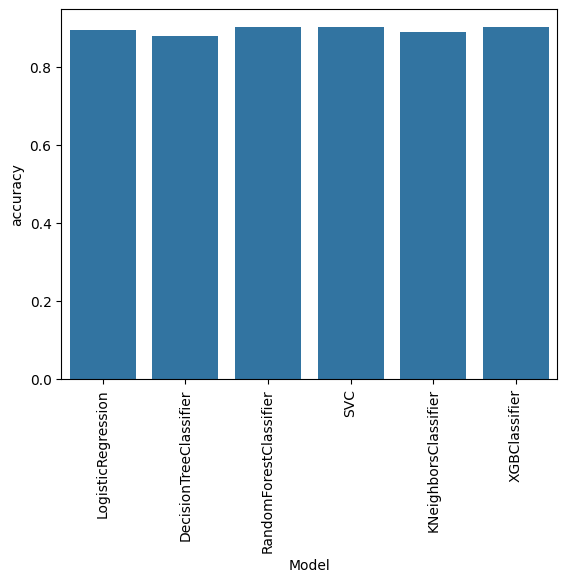

In [18]:
sns.barplot(x="Model", y="accuracy", data=model_and_accuracy)
plt.xticks(rotation=90)
plt.show()

In [20]:
#Grid_search for better accuracy in XGBoost
from sklearn.model_selection import GridSearchCV

params = {
        'colsample_bytree': [0.6, 0.8, 1.0],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'min_child_weight': [1, 5, 10],
        }

xbgoost_model = XGBClassifier()

grid = GridSearchCV(estimator = xbgoost_model, param_grid = params, scoring='roc_auc',n_jobs=-1)
grid.fit(X_train.toarray(),y_train.values)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc')

In [21]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
grid.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 1.0}

In [23]:
grid.best_score_

0.9435380969283005

In [25]:
#Building Model with Best Parameters 
from sklearn.metrics import classification_report
best_params = {'colsample_bytree': 0.6,
         'gamma': 2,
         'max_depth': 5,
         'min_child_weight': 1,
         'subsample': 0.8}

xbgoost_model = XGBClassifier(**best_params)
xbgoost_model.fit(X_train.toarray(),y_train.values)
y_pred = xbgoost_model.predict(X_test.toarray())

print(classification_report(y_test.values,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.62      0.52      0.56       731

    accuracy                           0.91      6330
   macro avg       0.78      0.74      0.76      6330
weighted avg       0.90      0.91      0.90      6330



In [27]:
#ROC Report for best model
from sklearn.metrics import roc_curve


proba = xbgoost_model.predict_proba(X_test.toarray())
fpr, tpr, thresholds = roc_curve(y_test, proba[: ,1])

n_fpr, n_tpr, thresholds = roc_curve(y_test, [0 for _ in range(len(y_test))])

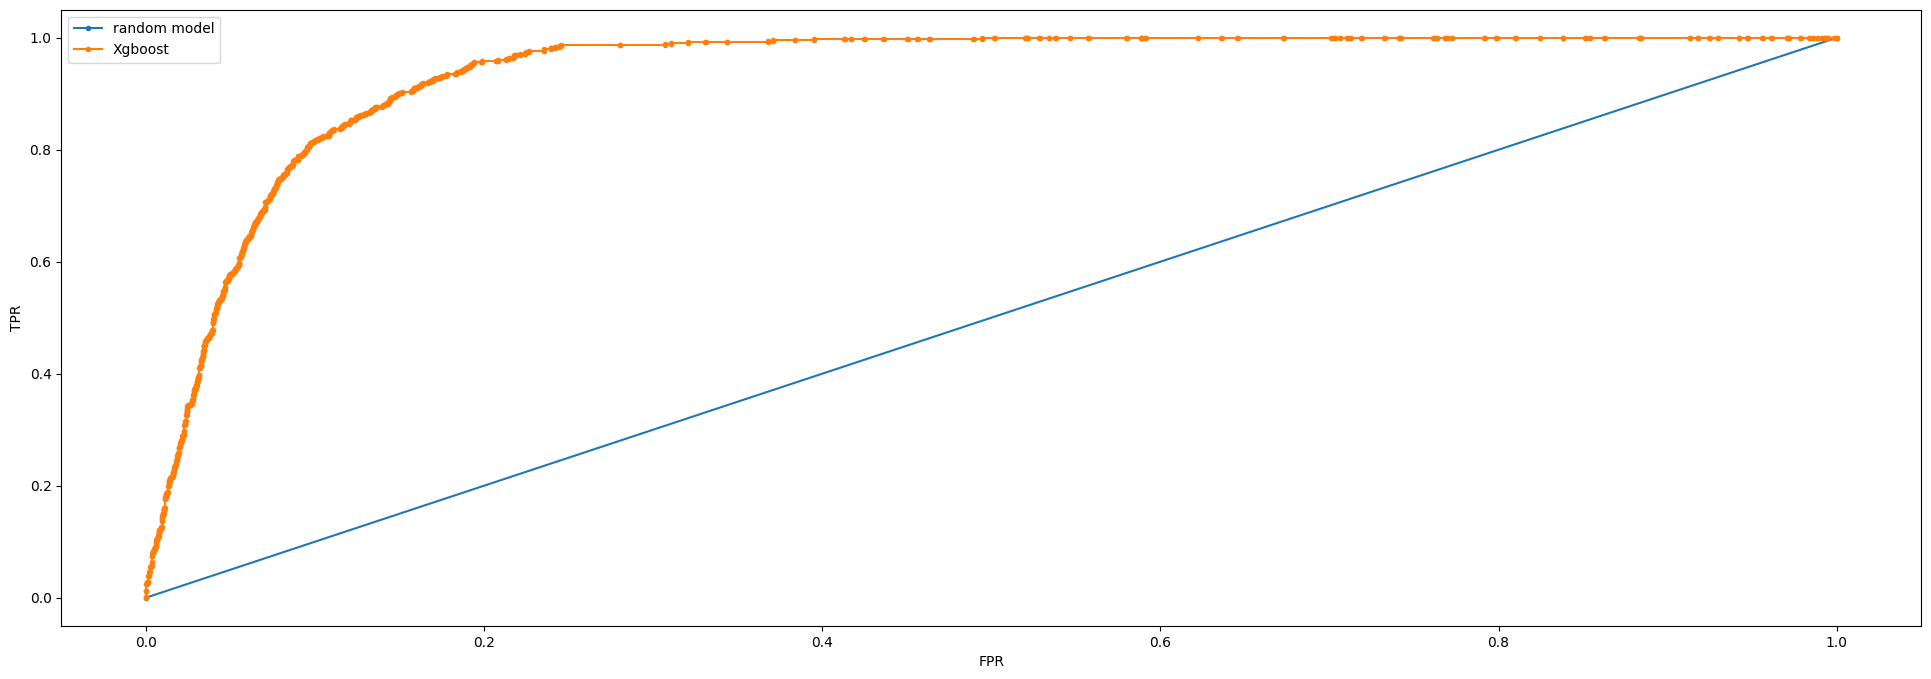

In [28]:
plt.figure(figsize=(24,8))

plt.plot(n_fpr, n_tpr, marker='.', label='random model')
plt.plot(fpr, tpr, marker='.', label='Xgboost')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

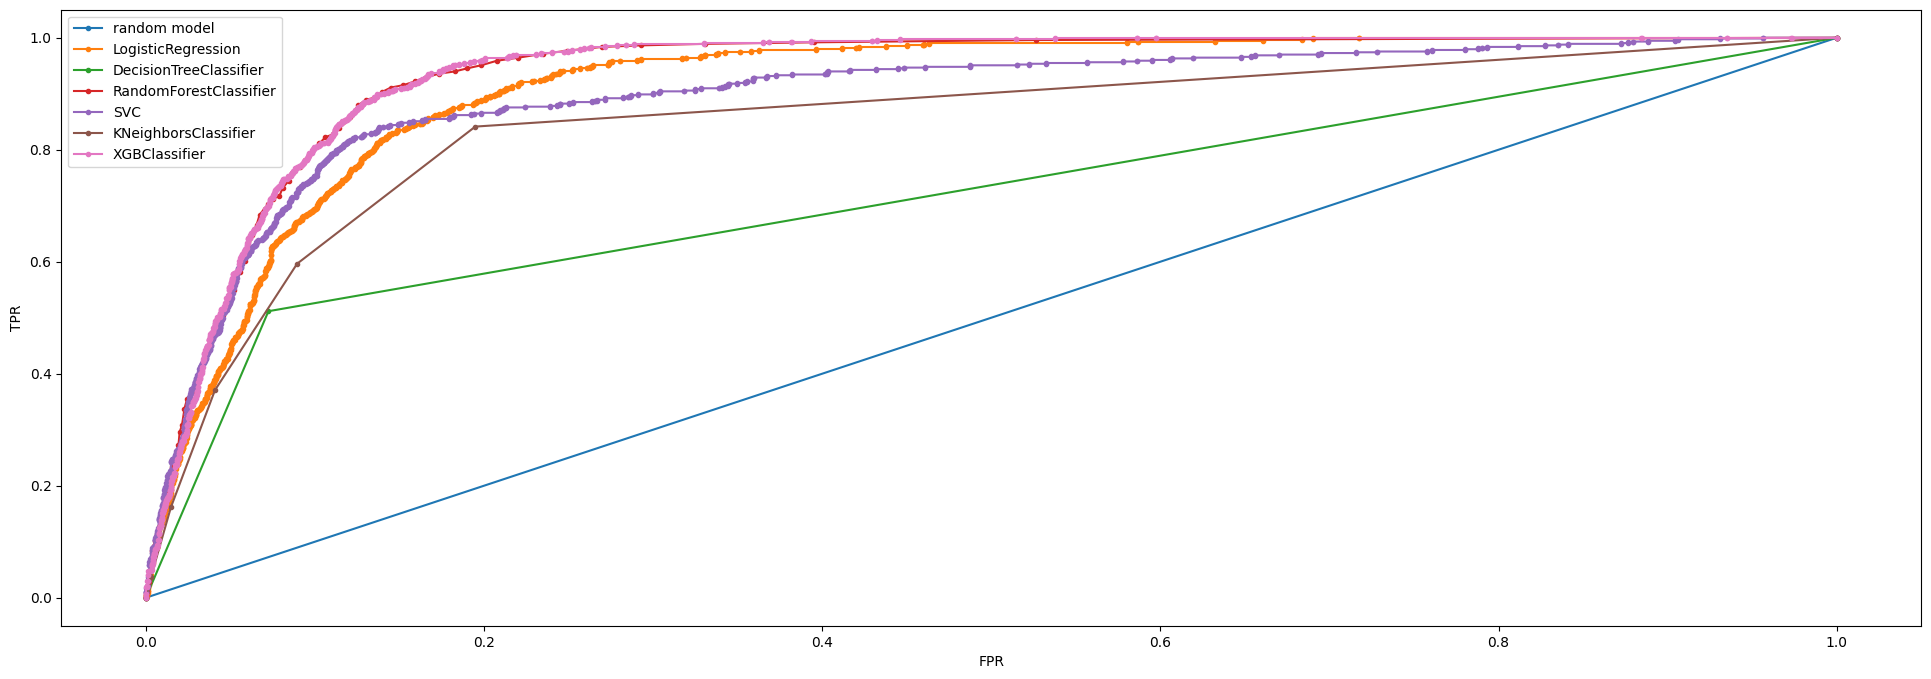

In [30]:
#ROC Comparison for all models
plt.figure(figsize=(24,8))
n_fpr, n_tpr, thresholds = roc_curve(y_test, [0 for _ in range(len(y_test))])
plt.plot(n_fpr, n_tpr, marker='.', label='random model')
for model_name, v in base_models.items():
    proba = v["trained_mode"].predict_proba(X_test.toarray())
    fpr, tpr, thresholds = roc_curve(y_test, proba[: ,1])
    plt.plot(fpr, tpr, marker='.', label=model_name)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()